<a href="https://colab.research.google.com/github/eashuu/AnacondaGPT/blob/main/GPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2025-03-10 14:04:17--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.02s   

2025-03-10 14:04:17 (60.2 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [3]:
with open('input.txt','r',encoding='utf-8') as f:
  text=f.read()

In [4]:
print(len(text))

1115394


In [5]:
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [6]:
chars = sorted(list(set(text)))
print("".join(chars))
len(chars)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz


65

In [7]:
stoi={ ch:i for i,ch in enumerate(chars)}
itos={ i:ch for i,ch in enumerate(chars)}
encode=lambda s: [stoi[c] for c in s]
decode=lambda l: ''.join([itos[i] for i in l])

print(encode("hii there"))
print(decode(encode("hii there")))

[46, 47, 47, 1, 58, 46, 43, 56, 43]
hii there


In [8]:
import torch
data = torch.tensor(encode(text),dtype=torch.long)
print(data.shape,data.dtype)
print(data[:1000])

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

In [9]:
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

In [10]:
block_size = 8
train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [11]:
x = train_data[:block_size]
y= train_data[:block_size+1]
for t in range(block_size):
  context = x[:t+1]
  target = y[t]
  print(f"when input is {context} the target : {target}")

when input is tensor([18]) the target : 18
when input is tensor([18, 47]) the target : 47
when input is tensor([18, 47, 56]) the target : 56
when input is tensor([18, 47, 56, 57]) the target : 57
when input is tensor([18, 47, 56, 57, 58]) the target : 58
when input is tensor([18, 47, 56, 57, 58,  1]) the target : 1
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target : 15
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target : 47


In [12]:
torch.manual_seed(1337)
batch_size = 4
block_size = 8

def get_batch(split):
  data = train_data if split=='train' else val_data
  ix = torch.randint(len(data) - block_size,(batch_size,))
  x = torch.stack([data[i:i+block_size] for i in ix])
  y = torch.stack([data[i+1:i+block_size+1] for i in ix])
  return x,y

xb,yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('outputs:')
print(yb.shape)
print(yb)
print('----')

for b in range(batch_size):
  for t in range(block_size):
    context = xb[b,:t+1]
    target = yb[b,t]
    print(f"when the input is {context} the output is {target}")

inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
outputs:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
----
when the input is tensor([24]) the output is 43
when the input is tensor([24, 43]) the output is 58
when the input is tensor([24, 43, 58]) the output is 5
when the input is tensor([24, 43, 58,  5]) the output is 57
when the input is tensor([24, 43, 58,  5, 57]) the output is 1
when the input is tensor([24, 43, 58,  5, 57,  1]) the output is 46
when the input is tensor([24, 43, 58,  5, 57,  1, 46]) the output is 43
when the input is tensor([24, 43, 58,  5, 57,  1, 46, 43]) the output is 39
when the input is tensor([44]) the output is 53
when the input is tensor([44, 53]) the output is 56
when the

In [13]:
print(xb)

tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])


In [19]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):
  def __init__(self, vocab_size):
    super().__init__()
    self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

  def forward(self, idx, targets=None):
    logits = self.token_embedding_table(idx)

    if targets is None:
      loss = None
    else:
      B,T,C= logits.shape
      logits = logits.view(B*T, C)
      targets = targets.view(B*T)
      loss = F.cross_entropy(logits,targets)

    return logits, loss

  def generate(self, idx, max_new_tokens):
    for i in range(max_new_tokens):
      logits, loss =self(idx)
      logits=logits[:,-1,:]
      probs = F.softmax(logits, dim=-1)
      idx_next = torch.multinomial(probs, num_samples=1)
      idx = torch.cat((idx, idx_next), dim=1)
    return idx

vocab_size = len(chars)
m = BigramLanguageModel(vocab_size)
logits,loss = m(xb,yb)
print(logits.shape)
print(loss)

print(decode(m.generate(idx = torch.zeros((1,1), dtype=torch.long),max_new_tokens=100)[0].tolist()))

torch.Size([32, 65])
tensor(4.8786, grad_fn=<NllLossBackward0>)

Sr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3


In [21]:
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [26]:
batch_size = 32
for steps in range(10000):
  xb, yb = get_batch('train')
  logits, loss = m(xb, yb)
  optimizer.zero_grad(set_to_none=True)
  loss.backward()
  optimizer.step()
print(loss.item())

2.36177921295166


In [28]:
print(decode(m.generate(idx = torch.zeros((1,1), dtype=torch.long),max_new_tokens=500)[0].tolist()))


Sowin?
Wofutameesur hy rt t atshanore tokseorrog meve.
Ppemboof BHesth to moou;
Thef;

DENTof, ws rro, iotheray n ouloote de thoofare weasto s
Thandndwoumere o earsed IZRARDOlllot

t,


IXI 's;
pof wrrasth, hyoroug malarif we baler me y thorellead d
Fofe burooce ngoule d d, toreantearothiman sin: theener-pis cheedoto s hay h airthataloovenouzs moby ROMENCAnet
F l ano my ce herulp, e fed of ciselath ce thedinomethiprth lutissss?
Angoled nass! by mep,
Wivexchowathy stos IOHURGet winomme medoimy-th


In [30]:
torch.manual_seed(1337)
B,T,C = 4,8,2
x = torch.randn(B,T,C)
x.shape

torch.Size([4, 8, 2])

In [39]:
xbow = torch.zeros((B,T,C))
for b in range(B):
  for t in range(T):
    xprev = x[b,:t+1]
    xbow[b,t] = torch.mean(xprev, 0)

In [40]:
wei = torch.tril(torch.ones(T,T))
wei = wei / wei.sum(1, keepdim=True)
xbow2 = wei @ x
torch.allclose(xbow,xbow2)

False

In [43]:
xbow[0] ,xbow2[0]

(tensor([[ 0.1808, -0.0700],
         [-0.0894, -0.4926],
         [ 0.1490, -0.3199],
         [ 0.3504, -0.2238],
         [ 0.3525,  0.0545],
         [ 0.0688, -0.0396],
         [ 0.0927, -0.0682],
         [-0.0341,  0.1332]]),
 tensor([[ 0.1808, -0.0700],
         [-0.0894, -0.4926],
         [ 0.1490, -0.3199],
         [ 0.3504, -0.2238],
         [ 0.3525,  0.0545],
         [ 0.0688, -0.0396],
         [ 0.0927, -0.0682],
         [-0.0341,  0.1332]]))

In [35]:
# toy example illustrating how matrix multiplication can be used for a "weighted aggregation"
torch.manual_seed(42)
a = torch.tril(torch.ones(3, 3))
a = a / torch.sum(a, 1, keepdim=True)
b = torch.randint(0,10,(3,2)).float()
c = a @ b
print('a=')
print(a)
print('--')
print('b=')
print(b)
print('--')
print('c=')
print(c)

a=
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
--
b=
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
--
c=
tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])


In [44]:
# version 3: use Softmax
tril = torch.tril(torch.ones(T, T))
wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)
xbow3 = wei @ x
torch.allclose(xbow, xbow3)


False

In [45]:
# version 4: self-attention!
torch.manual_seed(1337)
B,T,C = 4,8,32 # batch, time, channels
x = torch.randn(B,T,C)

# let's see a single Head perform self-attention
head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)
k = key(x)   # (B, T, 16)
q = query(x) # (B, T, 16)
wei =  q @ k.transpose(-2, -1) # (B, T, 16) @ (B, 16, T) ---> (B, T, T)

tril = torch.tril(torch.ones(T, T))
#wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)

v = value(x)
out = wei @ v
#out = wei @ x

out.shape

torch.Size([4, 8, 16])

In [46]:
k = torch.randn(B,T,head_size)
q = torch.randn(B,T,head_size)
wei = q @ k.transpose(-2, -1) * head_size**-0.5

In [47]:
k.var()

tensor(1.0449)

In [48]:
q.var()

tensor(1.0700)

In [49]:
wei.var()

tensor(1.0918)

In [50]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5]), dim=-1)

tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])

In [51]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5])*8, dim=-1)

tensor([0.0326, 0.0030, 0.1615, 0.0030, 0.8000])

In [52]:
class LayerNorm1d: # (used to be BatchNorm1d)

  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)

  def __call__(self, x):
    # calculate the forward pass
    xmean = x.mean(1, keepdim=True) # batch mean
    xvar = x.var(1, keepdim=True) # batch variance
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    return self.out

  def parameters(self):
    return [self.gamma, self.beta]

torch.manual_seed(1337)
module = LayerNorm1d(100)
x = torch.randn(32, 100) # batch size 32 of 100-dimensional vectors
x = module(x)
x.shape

torch.Size([32, 100])

In [53]:
x[:,0].mean(), x[:,0].std()

(tensor(0.1469), tensor(0.8803))

In [54]:
x[0,:].mean(), x[0,:].std()

(tensor(-9.5367e-09), tensor(1.0000))

In [55]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0
# ------------

torch.manual_seed(1337)

# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

model = BigramLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))


0.209729 M parameters
step 0: train loss 4.4116, val loss 4.4022
step 100: train loss 2.6568, val loss 2.6670
step 200: train loss 2.5090, val loss 2.5059
step 300: train loss 2.4196, val loss 2.4338
step 400: train loss 2.3504, val loss 2.3566
step 500: train loss 2.2965, val loss 2.3129
step 600: train loss 2.2410, val loss 2.2500
step 700: train loss 2.2057, val loss 2.2191
step 800: train loss 2.1633, val loss 2.1864
step 900: train loss 2.1244, val loss 2.1510
step 1000: train loss 2.1038, val loss 2.1308
step 1100: train loss 2.0707, val loss 2.1197
step 1200: train loss 2.0377, val loss 2.0800
step 1300: train loss 2.0268, val loss 2.0650
step 1400: train loss 1.9918, val loss 2.0356
step 1500: train loss 1.9697, val loss 2.0293
step 1600: train loss 1.9645, val loss 2.0499
step 1700: train loss 1.9404, val loss 2.0129
step 1800: train loss 1.9095, val loss 1.9951
step 1900: train loss 1.9067, val loss 1.9855
step 2000: train loss 1.8854, val loss 1.9948
step 2100: train loss 1.

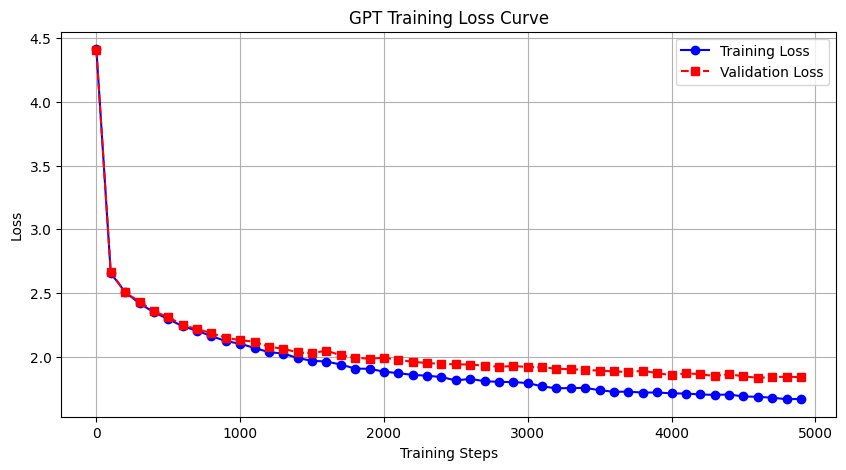

In [56]:
import matplotlib.pyplot as plt
steps = list(range(0, 5000, 100))
train_loss = [4.4116, 2.6568, 2.5090, 2.4196, 2.3504, 2.2965, 2.2410, 2.2057, 2.1633, 2.1244,
              2.1038, 2.0707, 2.0377, 2.0268, 1.9918, 1.9697, 1.9645, 1.9404, 1.9095, 1.9067,
              1.8854, 1.8727, 1.8597, 1.8530, 1.8428, 1.8161, 1.8283, 1.8101, 1.8050, 1.8033,
              1.7955, 1.7697, 1.7541, 1.7567, 1.7573, 1.7398, 1.7270, 1.7283, 1.7210, 1.7219,
              1.7146, 1.7136, 1.7060, 1.7032, 1.7057, 1.6907, 1.6878, 1.6808, 1.6689, 1.6716]
val_loss = [4.4022, 2.6670, 2.5059, 2.4338, 2.3566, 2.3129, 2.2500, 2.2191, 2.1864, 2.1510,
            2.1308, 2.1197, 2.0800, 2.0650, 2.0356, 2.0293, 2.0499, 2.0129, 1.9951, 1.9855,
            1.9948, 1.9766, 1.9631, 1.9516, 1.9464, 1.9424, 1.9406, 1.9322, 1.9233, 1.9289,
            1.9216, 1.9184, 1.9088, 1.9034, 1.9000, 1.8925, 1.8869, 1.8814, 1.8918, 1.8732,
            1.8576, 1.8720, 1.8653, 1.8499, 1.8656, 1.8477, 1.8371, 1.8415, 1.8457, 1.8415]
plt.figure(figsize=(10, 5))
plt.plot(steps, train_loss, label="Training Loss", color="blue", marker="o", linestyle="-")
plt.plot(steps, val_loss, label="Validation Loss", color="red", marker="s", linestyle="--")
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("GPT Training Loss Curve")
plt.legend()
plt.grid(True)

plt.show()

In [57]:
torch.save(model.state_dict(), "bigram_model.pth")

In [58]:
model = BigramLanguageModel()
model.load_state_dict(torch.load("bigram_model.pth"))
model.to('cpu')
model.eval()
context = torch.zeros((1, 1), dtype=torch.long, device=device)
generated_text = decode(model.generate(context, max_new_tokens=2000)[0].tolist())
print(generated_text)


<ipython-input-58-d623cbebc091>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("bigram_model.pth"))




KING RICHARDS II:
Wha, by the listleam'd on, feyet,----itso, she go it the versement, sweet the not mine is his.

GRETER:
Why chose hath good your mostried our liverd my from I know leave
Scectal, My lords, alnocks, sir,--

LUCHIO:
You is liess you littre streends of the brives with is my is the lund;
Norfoldstion but
Spast dreeper it.

HERMBENTH:
What bENS VINCENTIO:
Not, some dewing!
A kingsty a way in Shants must! I my secome isivole war at some's gread:
Coute else thy looks to your and then
Wivou! where some that is give; one thee,
And heirs hath beiefts.

COMIO:
Mi-her the shall untannot where Purse to agare to let;
I stay warge lave; ever litded shee it.

ROMEO:
The sught it not my one this a sish batch that you mine, I him poor.

MARIAN's.

MINy this spits dray,
Where's wiltunus and mines or hig,
That quoest thee means, to, stay in prince
the remiseds would our lord?

Sirre Richard:
I brood him of lade, whose herer brotcers.

SICINIUS:
Nay, childre by lord?
Oh, my slet their h